# Movie plot analysis

#### We will inspect the plot of movies to detect any change in lexical fields with respect to 9/11.

In [25]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [26]:
#Load the data
movies = pd.read_pickle('../data/movies.pkl')
plot_summaries = pd.read_pickle('../data/plot_summaries.pkl')

movies_and_plot = pd.merge(left=movies, right=plot_summaries, on='Wikipedia_movie_ID')
movies_and_plot.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,nb_languages,nb_country,nb_genre,Movie_language,FirstLanguage_Name,SecondLanguage_Name,FirstCountry_Name,SecondCountry_Name,Plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",1,1,7,[English ],English,None,United States of America,None,"Set in the second half of the 22nd century, th..."
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1,1,3,[English ],English,None,United Kingdom,None,A series of murders of rich young women throug...
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,NaN,106.0,"{""/m/04306rv"": ""German Language""}",[Germany],[Drama],1,1,1,[German ],German,None,Germany,None,"Eva, an upper class housewife, becomes frustra..."
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,NaN,86.0,"{""/m/02h40lc"": ""English Language""}",[South Africa],"[Family Film, Fantasy, Adventure, World cinema]",1,1,4,[English ],English,None,South Africa,None,"Every hundred years, the evil Morgana returns..."
4,6631279,/m/0gffwj,Little city,1997-04-04 00:00:00+00:00,NaN,93.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Romantic comedy, Ensemble Film, Comedy-drama,...",1,1,7,[English ],English,None,United States of America,None,"Adam, a San Francisco-based artist who works a..."


#### Let us first analyse the plots in a simple manner. Let us check the number of occurences of key words in plots. 

In [27]:
key_words = ['plane', 'tower', 'twin tower', 'terrorism', 'terrorist', 'hijack', 'islam', 'world trade center']

In [28]:
df_plots = movies_and_plot[['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Movie_release_date', 'Plot']]
col_name_of_key_words = ['Count_of_' + '_'.join(word.split(' ')) for word in key_words]

for i in range(len(key_words)):
    df_plots[col_name_of_key_words[i]] = df_plots['Plot'].apply(lambda x: x.count(key_words[i]))

df_plots.head()

C:\Users\mirco\AppData\Local\Temp\ipykernel_14828\988202198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plots[col_name_of_key_words[i]] = df_plots['Plot'].apply(lambda x: x.count(key_words[i]))
C:\Users\mirco\AppData\Local\Temp\ipykernel_14828\988202198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plots[col_name_of_key_words[i]] = df_plots['Plot'].apply(lambda x: x.count(key_words[i]))
C:\Users\mirco\AppData\Local\Temp\ipykernel_14828\988202198.py:5: SettingWithCopyWarning: 
A value is 

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Plot,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,"Set in the second half of the 22nd century, th...",1,0,0,0,0,0,0,0
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,A series of murders of rich young women throug...,0,0,0,0,0,0,0,0
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,"Eva, an upper class housewife, becomes frustra...",0,0,0,0,0,0,0,0
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,"Every hundred years, the evil Morgana returns...",0,0,0,0,0,0,0,0
4,6631279,/m/0gffwj,Little city,1997-04-04 00:00:00+00:00,"Adam, a San Francisco-based artist who works a...",0,0,0,0,0,0,0,0


In [29]:
df_key_words_occ = df_plots.groupby(by=df_plots['Movie_release_date'].dt.year)[col_name_of_key_words].sum()
df_key_words_occ

,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center
Movie_release_date,,,,,,,,
1894.0,0,0,0,0,0,0,0,0
1895.0,0,0,0,0,0,0,0,0
1896.0,0,0,0,0,0,0,0,0
1898.0,0,0,0,0,0,0,0,0
1899.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2010.0,72,22,0,5,82,11,0,0
2011.0,46,13,0,1,24,6,0,0
2012.0,41,9,0,2,25,8,0,0


In [30]:
df_key_words_occ['Count_movies'] = movies_and_plot.groupby(by=movies_and_plot['Movie_release_date'].dt.year)['Wikipedia_movie_ID'].count()
df_key_words_occ

,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center,Count_movies
Movie_release_date,,,,,,,,,
1894.0,0,0,0,0,0,0,0,0,2
1895.0,0,0,0,0,0,0,0,0,1
1896.0,0,0,0,0,0,0,0,0,3
1898.0,0,0,0,0,0,0,0,0,5
1899.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2010.0,72,22,0,5,82,11,0,0,1060
2011.0,46,13,0,1,24,6,0,0,784
2012.0,41,9,0,2,25,8,0,0,530


Text(0, 0.38, 'Number of occurences of the word')

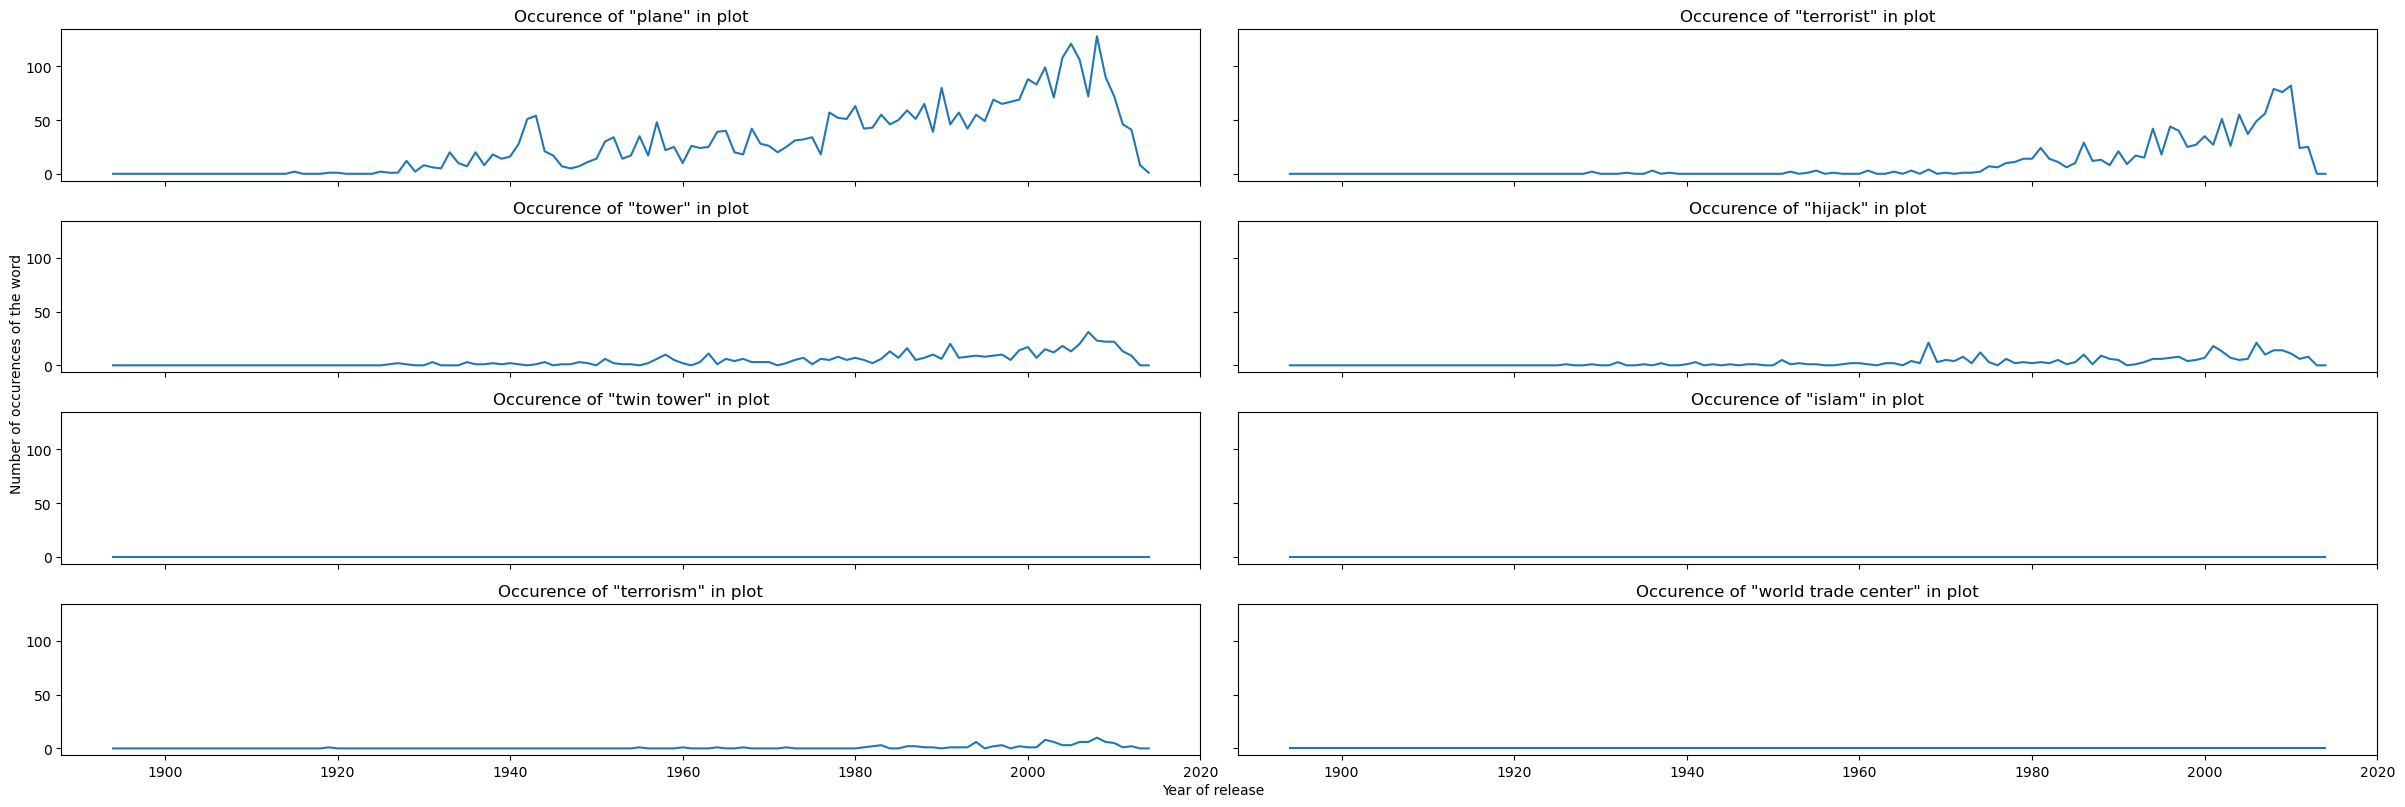

In [31]:
fig, ax = plt.subplots(math.ceil(len(key_words)/2), 2, figsize= (math.ceil(len(key_words)/2)*6, 8), sharey = True, sharex = True)

for i in range(len(key_words)):
    sbplt = ax[i%math.ceil(len(key_words)/2), math.floor(i/math.ceil(len(key_words)/2))]
    col_name = col_name_of_key_words[i]

    sbplt.plot(df_key_words_occ[col_name])
    sbplt.set_title('Occurence of "' + key_words[i] + '" in plot')
    
if (len(key_words) % 2 != 0):
    fig.delaxes(ax[math.floor(len(key_words)/2), 1]) # The indexing is zero-based here

fig.tight_layout()

fig.text(0.48,0, "Year of release")
fig.text(0,0.38, "Number of occurences of the word", rotation = 90)


#### Now by percentage 

In [32]:
df_key_words_occ_i = df_key_words_occ.reset_index()
df_key_words_occ_before = df_key_words_occ_i[(1992 <= df_key_words_occ_i['Movie_release_date']) * (df_key_words_occ_i['Movie_release_date'] < 2003) == 1]
df_key_words_occ_after = df_key_words_occ_i[(2003 <= df_key_words_occ_i['Movie_release_date'])  * (df_key_words_occ_i['Movie_release_date'] <= 2013) == 1]

In [33]:
df_key_words_occ_after

,Movie_release_date,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center,Count_movies
104,2003.0,71,12,0,6,26,7,0,0,931
105,2004.0,108,18,0,3,55,5,0,0,968
106,2005.0,121,13,0,3,37,6,0,0,1119
107,2006.0,106,20,0,6,49,21,0,0,1356
108,2007.0,72,31,0,6,56,10,0,0,1332
109,2008.0,128,23,0,10,79,14,0,0,1409
110,2009.0,90,22,0,6,76,14,0,0,1292
111,2010.0,72,22,0,5,82,11,0,0,1060
112,2011.0,46,13,0,1,24,6,0,0,784
113,2012.0,41,9,0,2,25,8,0,0,530


In [34]:
df_key_words_occ_before

,Movie_release_date,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center,Count_movies
93,1992.0,57,7,0,1,17,1,0,0,441
94,1993.0,42,8,0,1,15,3,0,0,506
95,1994.0,55,9,0,6,42,6,0,0,521
96,1995.0,49,8,0,0,18,6,0,0,481
97,1996.0,69,9,0,2,44,7,0,0,551
98,1997.0,65,10,0,3,40,8,0,0,596
99,1998.0,67,5,0,0,25,4,0,0,606
100,1999.0,69,14,0,2,27,5,0,0,639
101,2000.0,88,17,0,1,35,7,0,0,686
102,2001.0,83,7,0,1,27,18,0,0,736


In [36]:
df_key_words_occ_comp = pd.DataFrame(data={
    '1992-2002': df_key_words_occ_before.sum() / df_key_words_occ_before['Count_movies'].sum(),
    '2003-2013': df_key_words_occ_after.sum() / df_key_words_occ_after['Count_movies'].sum()
    })

df_key_words_occ_comp.drop(['Movie_release_date', 'Count_movies']).map(lambda x: str(round(x*100, 3)) + '%')

,1992-2002,2003-2013
Count_of_plane,11.287%,7.962%
Count_of_tower,1.656%,1.688%
Count_of_twin_tower,0.0%,0.0%
Count_of_terrorism,0.38%,0.443%
Count_of_terrorist,5.18%,4.696%
Count_of_hijack,1.185%,0.941%
Count_of_islam,0.0%,0.0%
Count_of_world_trade_center,0.0%,0.0%
